In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import img_as_float
from skimage.io import imread, imshow
from sklearn.cluster import KMeans
from typing import Tuple

import sys
sys.path.append("..")
from util import print_answer

%matplotlib inline

/anaconda3/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


## 1. Загрузите картинку parrots.jpg.

Преобразуйте изображение, приведя все значения в интервал от 0 до 1. Для этого можно воспользоваться функцией img_as_float из модуля skimage. Обратите внимание на этот шаг, так как при работе с исходным изображением вы получите некорректный результат.

In [2]:
image = img_as_float(imread("parrots.jpg"))

## 2. Создайте матрицу объекты-признаки: характеризуйте каждый пиксель тремя координатами - значениями интенсивности в пространстве RGB.

In [3]:
w, h, d = image.shape
pixels = pd.DataFrame(np.reshape(image, (w*h, d)), columns=["R", "G", "B"])
pixels.head()

,R,G,B
0,0.015686,0.494118,0.019608
1,0.007843,0.494118,0.007843
2,0.007843,0.494118,0.007843
3,0.007843,0.494118,0.007843
4,0.007843,0.501961,0.011765


## 3. Запустите алгоритм K-Means

с параметрами init='k-means++' и random_state=241. После выделения кластеров все пиксели, отнесенные в один кластер, попробуйте заполнить двумя способами: медианным и средним цветом по кластеру.

In [4]:
def cluster_pixels(pixels: pd.DataFrame, n_clusters: int=8) -> pd.DataFrame:
    pixels = pixels.copy()

    model = KMeans(n_clusters=n_clusters, init="k-means++", random_state=241)
    pixels["cluster"] = model.fit_predict(pixels)

    return pixels

def mean_median_image(pixels: pd.DataFrame) -> Tuple[np.array, np.array]:
    means = pixels.groupby("cluster").mean().values
    mean_pixels = np.array([means[c] for c in pixels["cluster"]])
    mean_image = np.reshape(mean_pixels, (w, h, d))

    medians = pixels.groupby("cluster").median().values
    median_pixels = np.array([medians[c] for c in pixels["cluster"]])
    median_image = np.reshape(median_pixels, (w, h, d))

    return mean_image, median_image

## 4. Измерьте качество получившейся сегментации с помощью метрики PSNR.

Эту метрику нужно реализовать самостоятельно (см. определение).

In [5]:
def psnr(image1: np.array, image2: np.array) -> float:
    mse = np.mean((image1 - image2) ** 2)
    return 10.0 * np.log10(1.0 / mse)

## 5. Найдите минимальное количество кластеров, при котором значение PSNR выше 20

(можно рассмотреть не более 20 кластеров, но не забудьте рассмотреть оба способа заполнения пикселей одного кластера). Это число и будет ответом в данной задаче.

Clustering: 1


/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


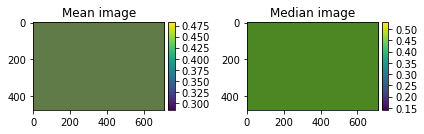

PSNR (mean): 9.82
PSNR (median): 9.43


Clustering: 2


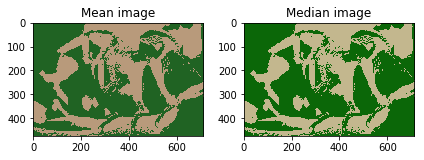

PSNR (mean): 12.08
PSNR (median): 11.66


Clustering: 3


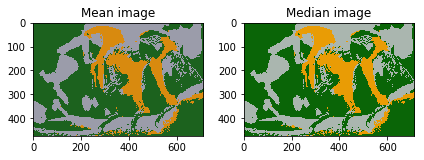

PSNR (mean): 13.15
PSNR (median): 12.77


Clustering: 4


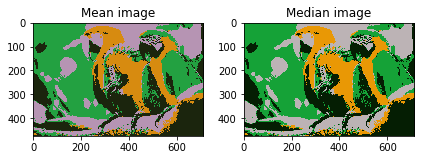

PSNR (mean): 14.37
PSNR (median): 14.01


Clustering: 5


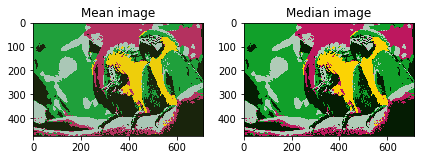

PSNR (mean): 15.53
PSNR (median): 15.18


Clustering: 6


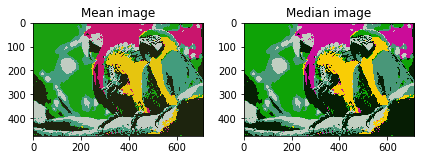

PSNR (mean): 16.54
PSNR (median): 16.05


Clustering: 7


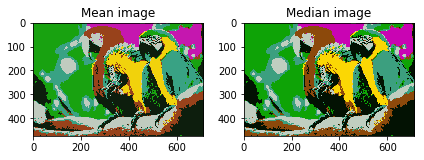

PSNR (mean): 17.64
PSNR (median): 17.34


Clustering: 8


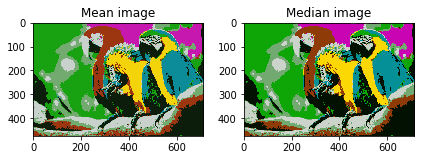

PSNR (mean): 18.44
PSNR (median): 18.14


Clustering: 9


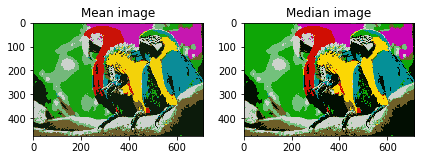

PSNR (mean): 19.11
PSNR (median): 18.81


Clustering: 10


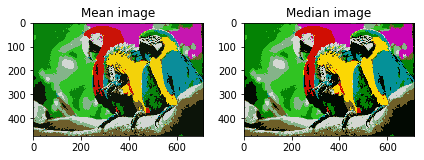

PSNR (mean): 19.64
PSNR (median): 19.42


Clustering: 11


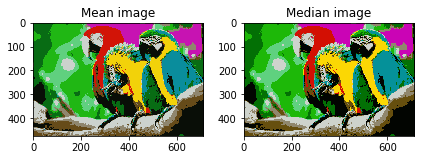

PSNR (mean): 20.13
PSNR (median): 19.84


11


In [6]:
def show_images(mean_image: np.array, median_image: np.array) -> None:
    fig=plt.figure()

    ax = fig.add_subplot(1, 2, 1)
    ax.title.set_text("Mean image")
    imshow(mean_image)

    ax = fig.add_subplot(1, 2, 2)
    ax.title.set_text("Median image")
    imshow(median_image)
    
    plt.show()

for n in range(1, 21):
    print(f"Clustering: {n}")
    
    cpixels = cluster_pixels(pixels, n)
    mean_image, median_image = mean_median_image(cpixels)
    show_images(mean_image, median_image)
    
    psnr_mean, psnr_median = psnr(image, mean_image), psnr(image, median_image)
    print(f"PSNR (mean): {psnr_mean:.2f}\nPSNR (median): {psnr_median:.2f}\n\n")
    
    if psnr_mean > 20 or psnr_median > 20:
        print_answer(1, str(n))
        break